In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers/Mall_Customers.csv


In [2]:
my_filepath='/kaggle/input/mall-customers/Mall_Customers.csv'
data = pd.read_csv(my_filepath,index_col='CustomerID')
df=data.copy()

In [3]:
print("Data columns : {}".format(df.columns))
print(df.head())

Data columns : Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')
             Genre  Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                         
1             Male   19                  15                      39
2             Male   21                  15                      81
3           Female   20                  16                       6
4           Female   23                  16                      77
5           Female   31                  17                      40


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None


# 1. Data visualisation

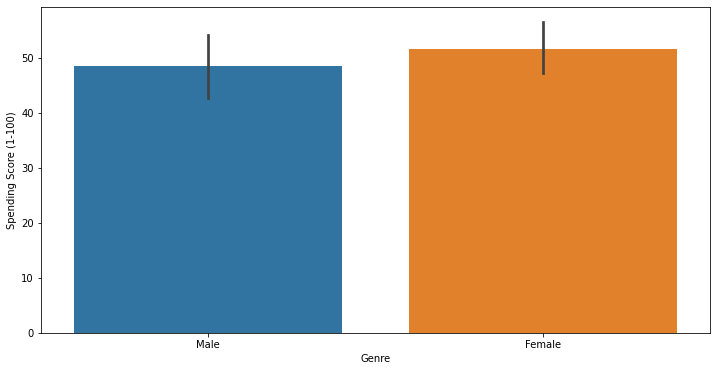

In [5]:
plt.figure(figsize=(12,6))
sns.barplot(x='Genre',y='Spending Score (1-100)',data=df)
plt.title('')
plt.show()

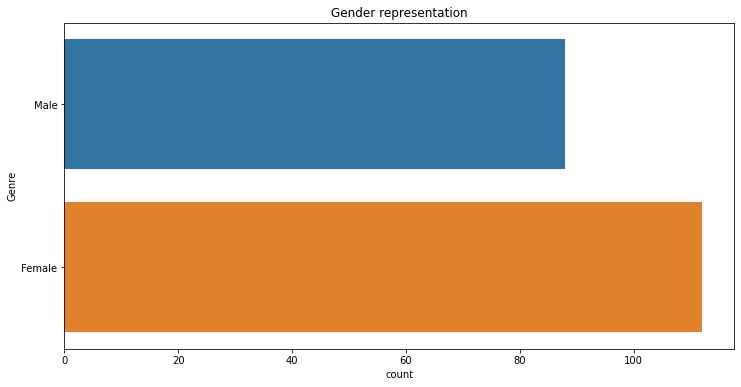

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(y='Genre', data=df)
plt.title('Gender representation')
plt.show()

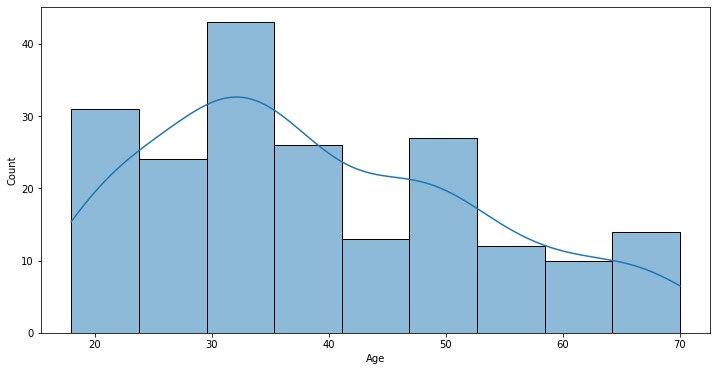

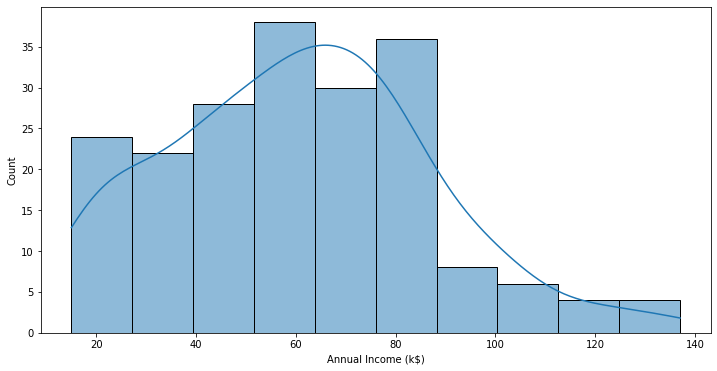

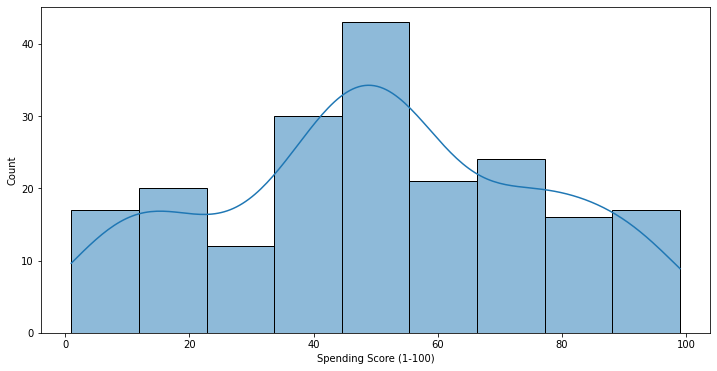

In [7]:
for col in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df,x=col, kde=True)
    plt.show()

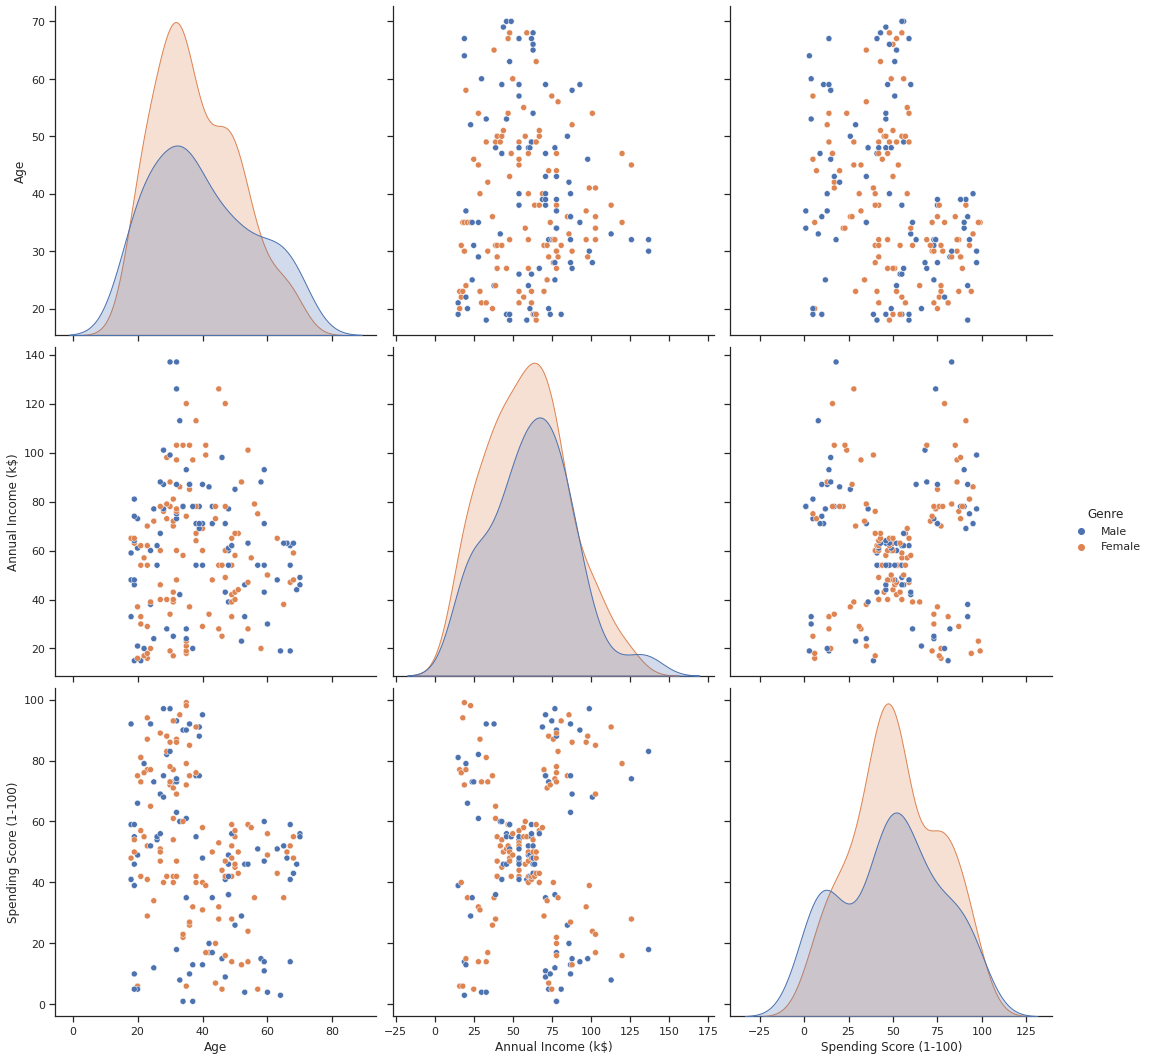

In [8]:
sns.set_theme(style="ticks")
sns.pairplot(df,hue='Genre',height=5)
plt.show()

# 2. k-means clustering

In [9]:
from sklearn.cluster import KMeans
def show(X,X_col):
    plt.figure(figsize=(6,6))
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlabel(X_col[0])
    plt.ylabel(X_col[1])
    plt.show()
    
def plot_kmeans_clusters(X,X_col,nb_clusters):
    km = KMeans(n_clusters=nb_clusters, max_iter=100)
    km.fit(X)
    centroids = km.cluster_centers_
    clusters=[i for i in range(nb_clusters)]
    fig, ax = plt.subplots(figsize=(6, 6))
    for color,cluster in zip(colors,clusters):
        lbl='cluster '+str(cluster)
        plt.scatter(X[km.labels_ == cluster, 0], X[km.labels_ == cluster, 1],
            c=color, label=lbl)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
    plt.legend()
    plt.xlabel(X_col[0])
    plt.ylabel(X_col[1])
    plt.title("k-means clustering with n_clusters = "+str(nb_clusters))
    plt.show()
    
colors=['green','blue','yellow','red','orange']

# 2.1 Age vs spending score

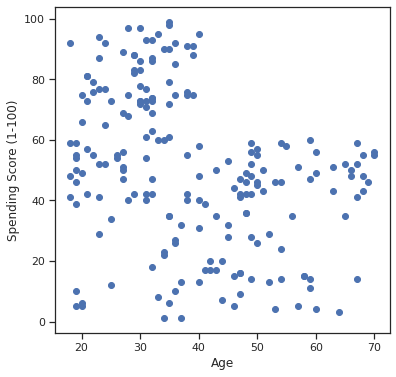

In [10]:
X1_col=['Age' , 'Spending Score (1-100)']
X1=np.array(df[X1_col])
show(X1,X1_col)

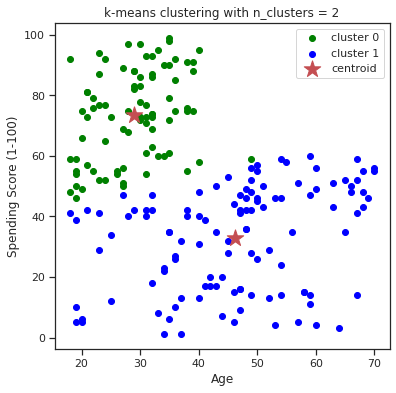

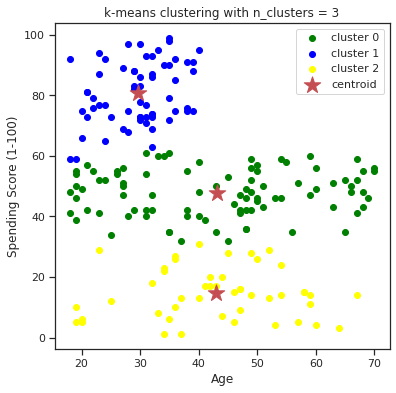

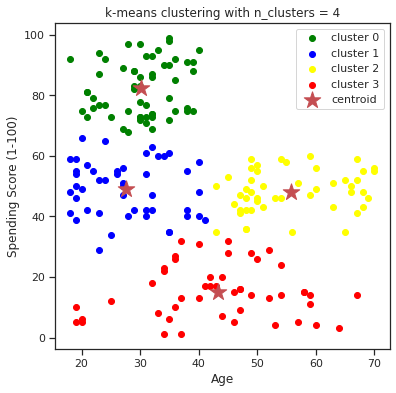

In [11]:
for nb_clusters in range(2,5):
    plot_kmeans_clusters(X1,X1_col,nb_clusters)

# 2.2 Annual income vs spending score

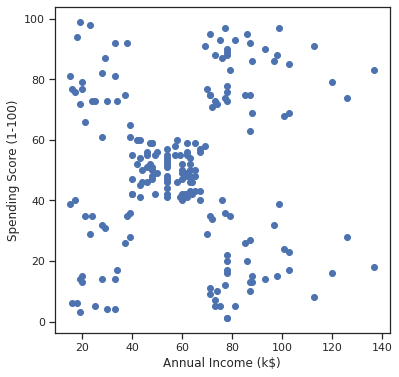

In [12]:
X2_col=['Annual Income (k$)' , 'Spending Score (1-100)']
X2=np.array(df[X2_col])
show(X2,X2_col)

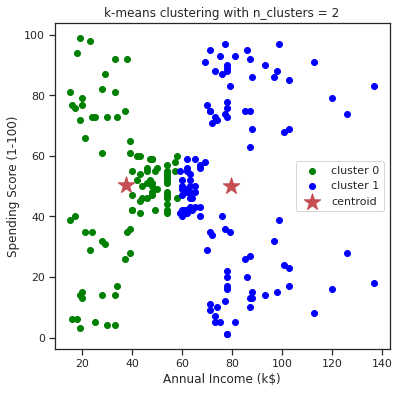

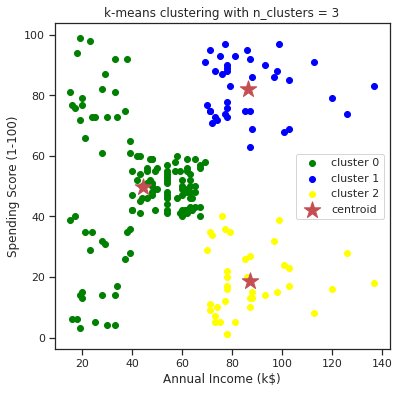

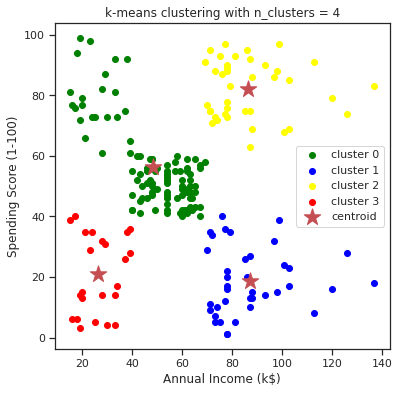

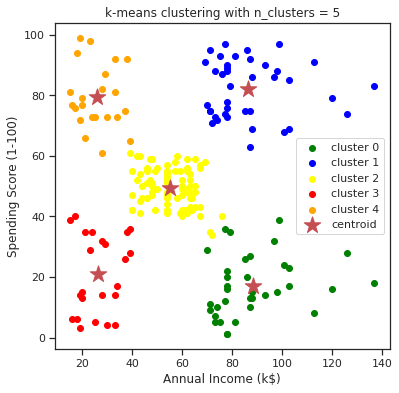

In [13]:
for nb_clusters in range(2,6):
    plot_kmeans_clusters(X2,X2_col,nb_clusters)